## 00 |

The objective of this **project** is to define the profile of the most profitable customers, based on a collection of **9.134** customer data, including demographics and buying behaviour.

In [1]:
# 📚 Basic libraries
import os # file managment
import pandas as pd # data manipulation
import numpy as np # numerical operations
import math # math in-build
import matplotlib.pyplot as plt # 2D visualization
import seaborn as sns # HD visualization
import warnings # warning messages managment

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # splitting data into train/test sets
from sklearn.linear_model import LinearRegression # logistic model
from sklearn.linear_model import ElasticNet, Lasso, Ridge # Regression model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # model evaluation metrics

# ⚙️ Settings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore') # ignore warnings

# 🔄 Functions
import sys # system path to our functions
sys.path.append("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data")

from easy.functions import open_data # quick data overview
from easy.functions import snake_columns # snake_case
from easy.functions import explore_data # checks for duplicates, NaN & empty spaces

## 03 | EDA

In [2]:
file_path = os.path.join("C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-cleaning-numerical-data/01_data/X_N.csv")
X_N = pd.read_csv(file_path)

In [3]:
X_N.describe()

,Unnamed: 0,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.0,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,4566.500000,0.143201,0.480622,1.281038,0.298226,2.214692,0.910444,2011.0,1.463762,15.461134,4566.500000,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,2636.903013,0.350297,0.655817,1.078521,0.540451,1.782244,0.537313,0.0,0.498712,8.653770,2636.903013,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.0,1.000000,1.000000,0.000000,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,2283.250000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2011.0,1.000000,8.000000,2283.250000,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,4566.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,2011.0,1.000000,15.000000,4566.500000,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,6849.750000,0.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2011.0,2.000000,23.000000,6849.750000,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,9133.000000,1.000000,2.000000,4.000000,2.000000,8.000000,2.000000,2011.0,2.000000,31.000000,9133.000000,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### Dealing with outliers

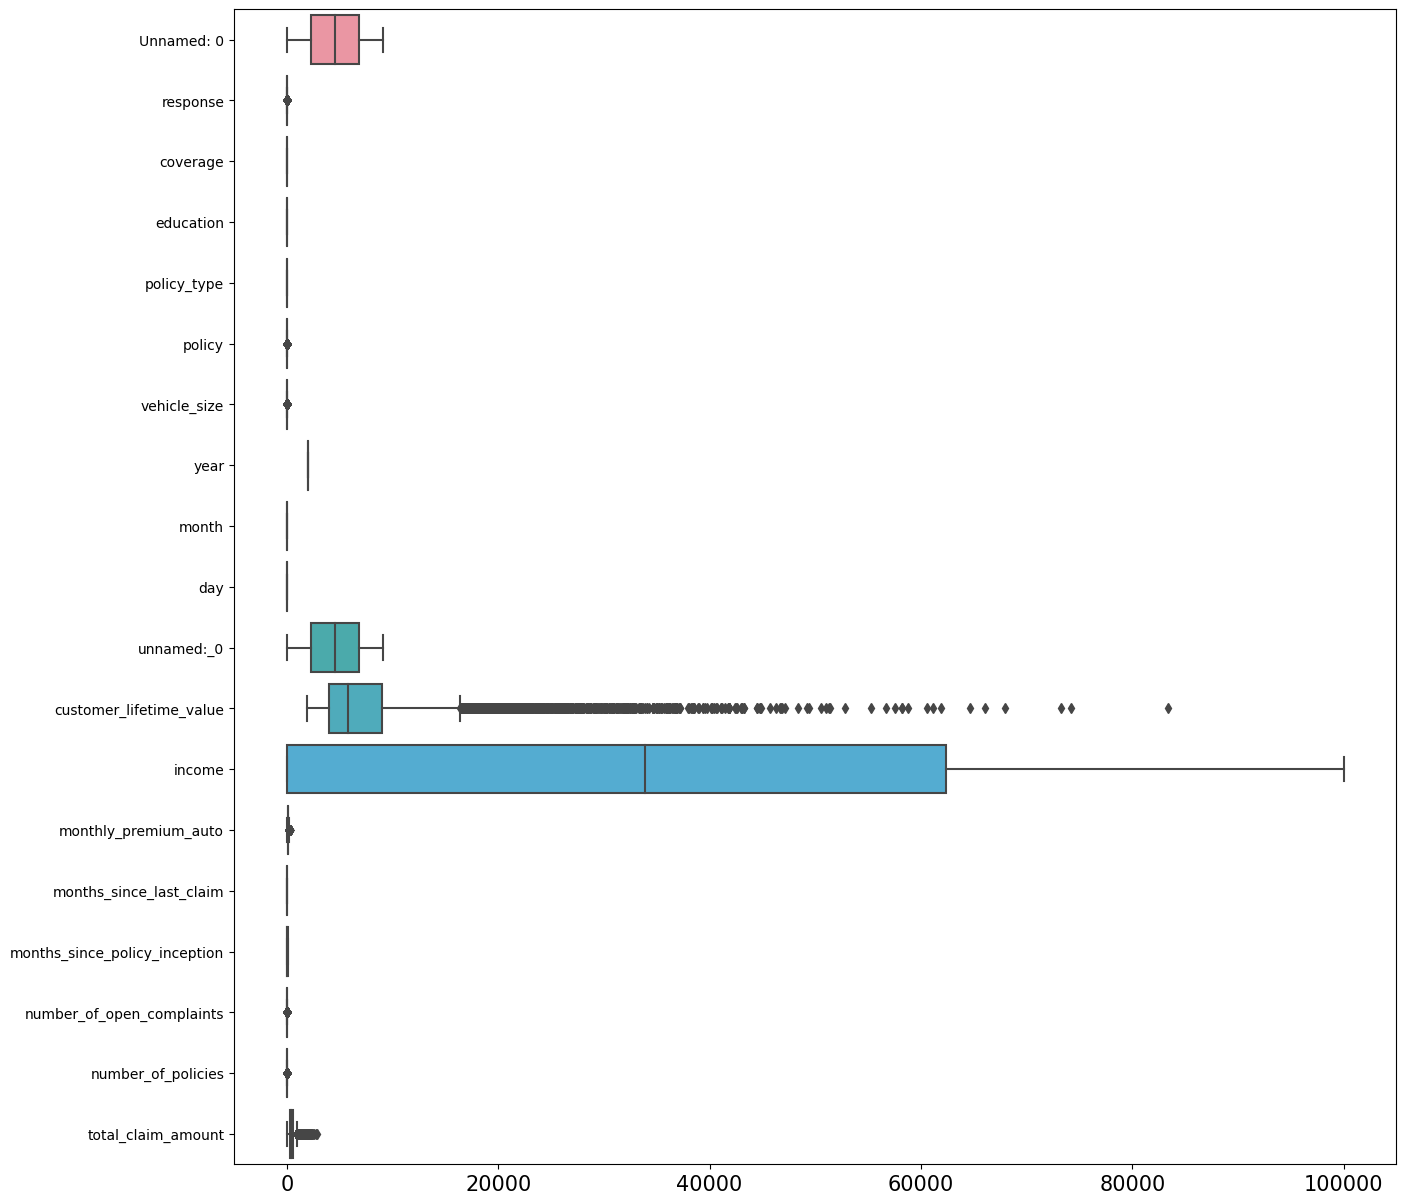

In [4]:
# For previously numerical columns
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=X_N, orient="h", ax=ax, showfliers=True, whis=1.5)
ax.tick_params(axis='x', labelsize=15) # Adjust the font size of the x-axis ticks
# Show the plot
plt.show()

`customer_lifetime_value` and `total_claim_amount` show some significant outliers to fix.

<AxesSubplot:xlabel='customer_lifetime_value'>

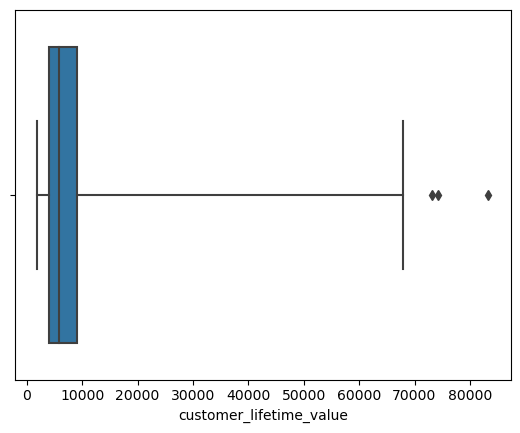

In [5]:
# Selecting the right whis
sns.boxplot(x=X_N['customer_lifetime_value'], whis=12)

iqr = np.percentile(X_N['customer_lifetime_value'], 75) - np.percentile(X_N['customer_lifetime_value'], 25)

# Defining the limits with desired whis
upper_limit = np.percentile(X_N['customer_lifetime_value'], 75) + 12 * iqr
lower_limit = np.percentile(X_N['customer_lifetime_value'], 25) - 12 * iqr

# Removing rows/outliers from the data
X_N = X_N[(X_N['customer_lifetime_value'] > lower_limit) & (X_N['customer_lifetime_value'] < upper_limit)]

<AxesSubplot:xlabel='total_claim_amount'>

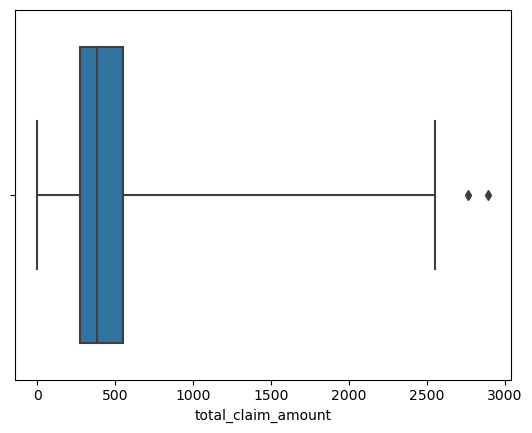

In [6]:
sns.boxplot(x=X_N['total_claim_amount'], whis=7.3)

iqr = np.percentile(X_N['total_claim_amount'], 75) - np.percentile(X_N['total_claim_amount'], 25)

# Defining the limits with desired whis
upper_limit = np.percentile(X_N['total_claim_amount'], 75) + 7.3 * iqr
lower_limit = np.percentile(X_N['total_claim_amount'], 25) - 7.3 * iqr

# Removing rows/outliers from the data
X_N = X_N[(X_N['total_claim_amount'] > lower_limit) & (X_N['total_claim_amount'] < upper_limit)]

In [7]:
# After some runs I left the cells as markdown, the model was performing worst.

In [8]:
X_N.shape

(9134, 19)

### Dealing with Multicollinearity

In [9]:
# Creating the matrix
X_corr = round(X_N.corr(), 4)

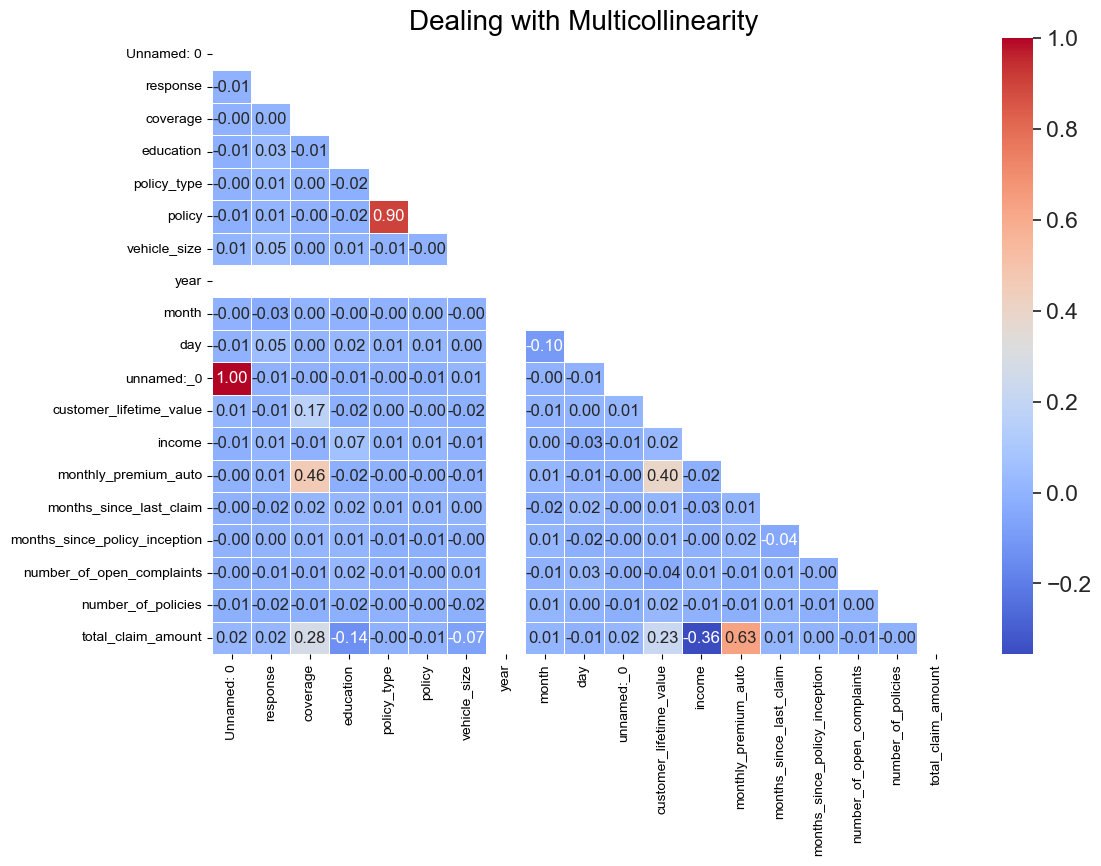

In [10]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(X_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(12, 8))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(X_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

`policy` feature (encoded) seems to have high correlation with our target `total_claim_amount` and we don't detect any multicollinearity with the other features. 

Nothing to do here!

### Checking Normal Distributions

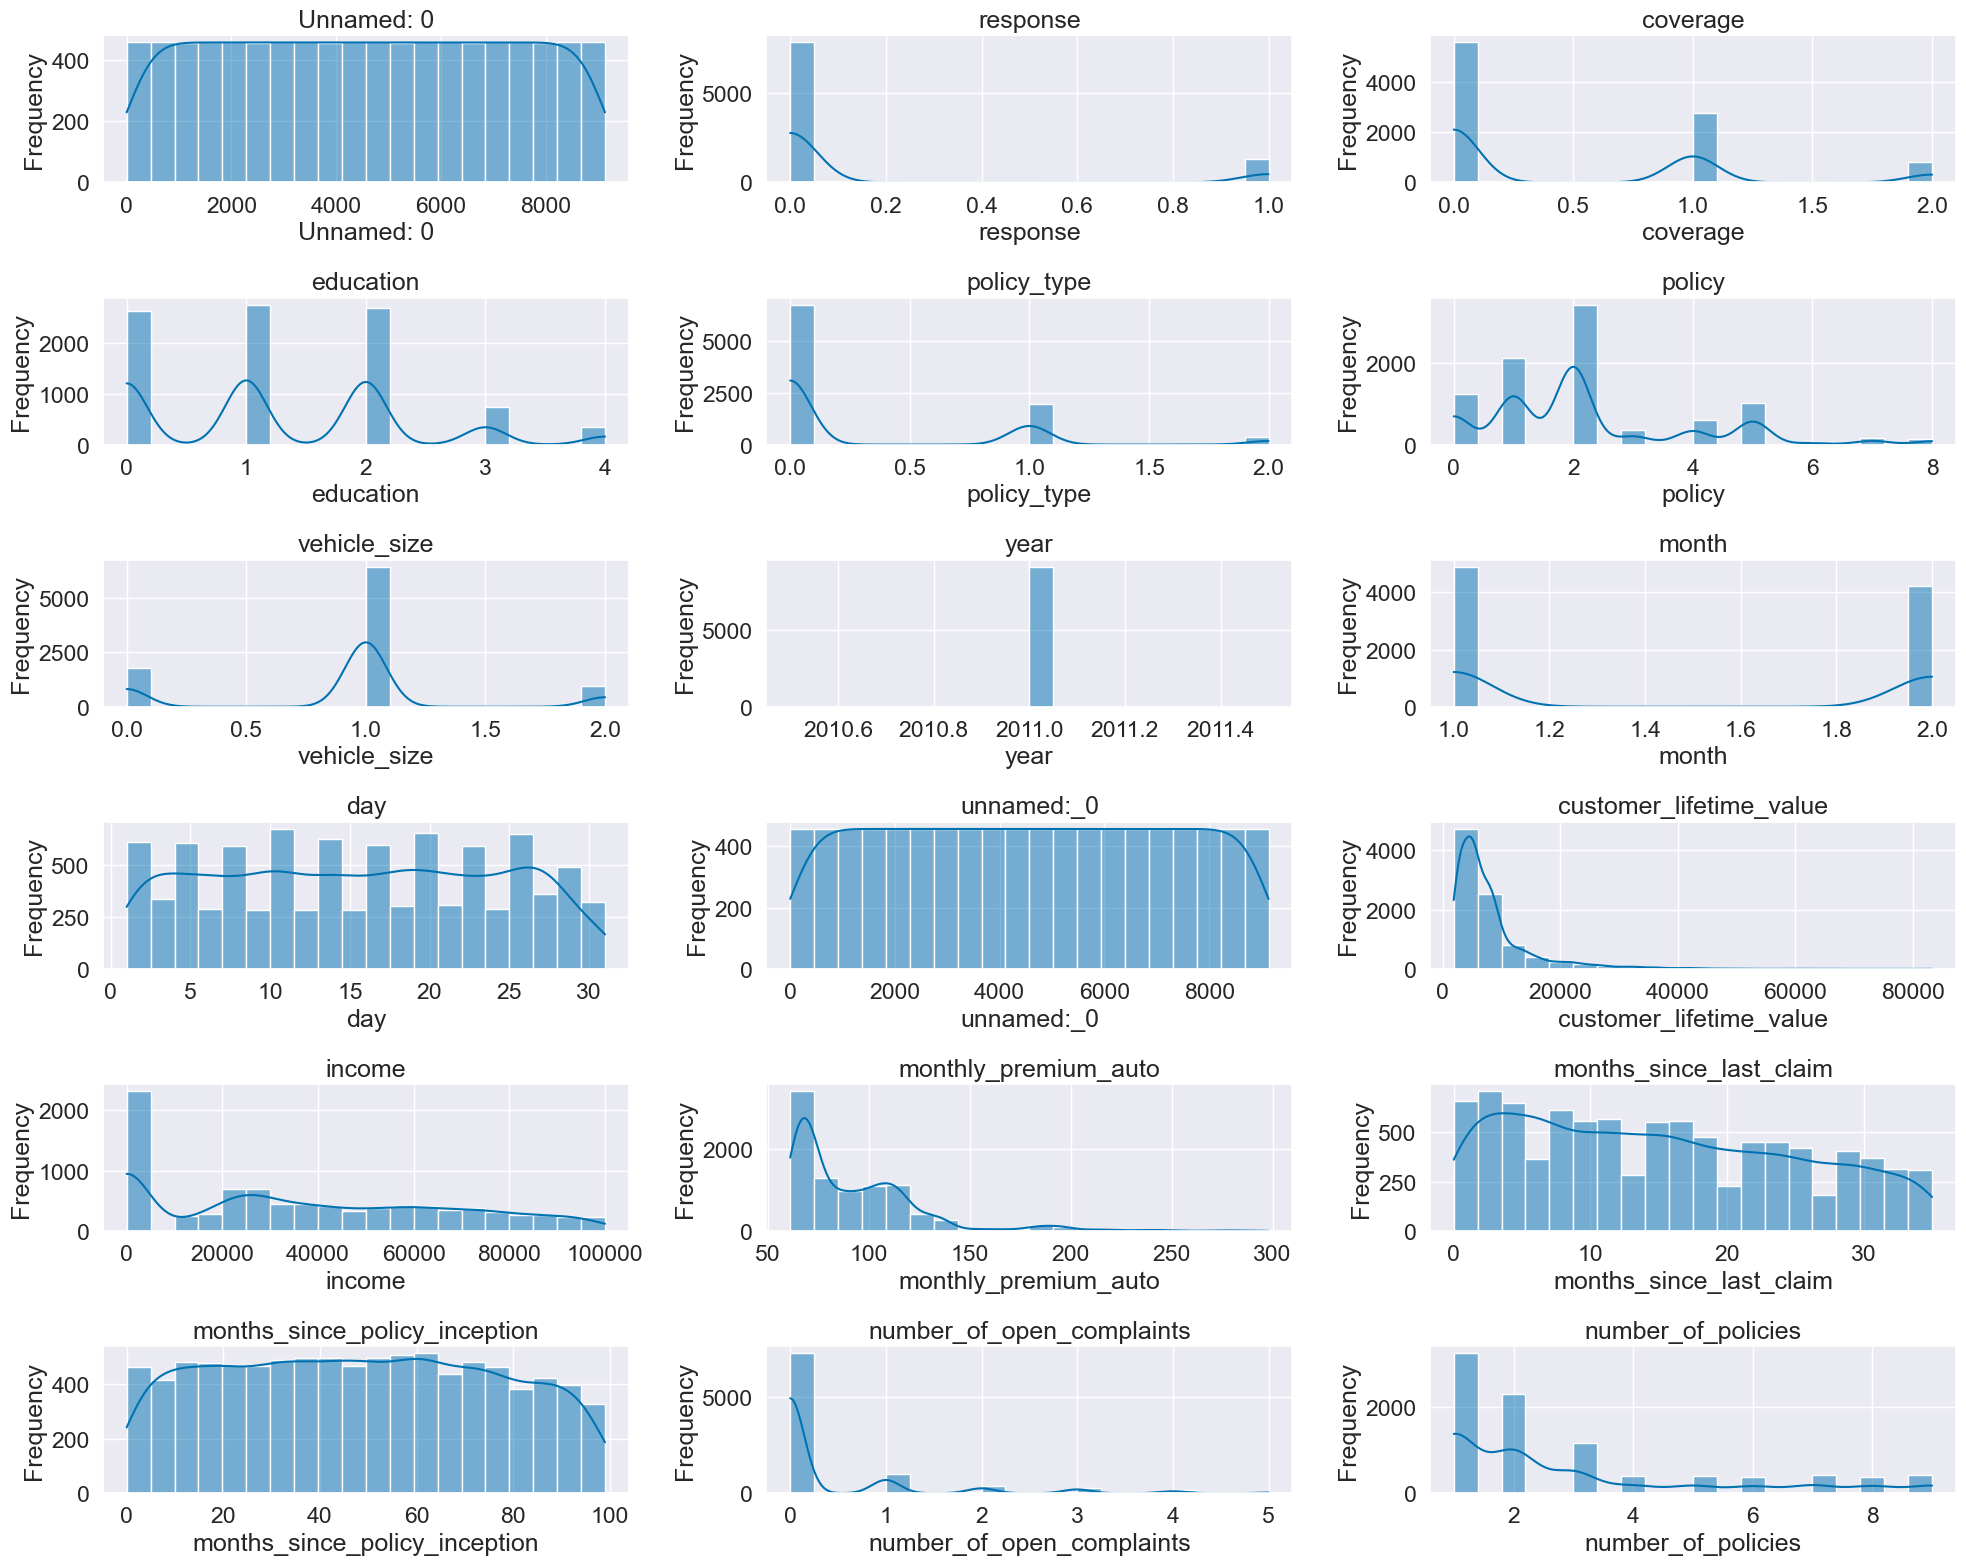

In [11]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 16))
color = '#0072B2'  # blue

for i, ax in enumerate(axes.flat):
    if i >= len(X_N.columns):
        break
    sns.histplot(data=X_N, x=X_N.columns[i], color=color, bins=20, kde=True, ax=ax)
    ax.set_title(X_N.columns[i])
    ax.set_xlabel(X_N.columns[i])
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()